In [1]:
import pandas as pd
import pingouin
import statsmodels.api as sm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

data = pd.read_csv("conjoint.csv")
keys= list(data.keys())
data["Money"]= data["Money"].astype(int)
data

C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,ID,Money,Jobs,Schools,Party,Woman,WomanStrong,vote.choice,client.choice,water.choice,school.choice,Wealth,PolPart,Vignette2,played.game
0,uuid:10cd1b9a-44d1-44b3-b0b3-85e104efc1ab,0,True,False,my-party,True,False,True,False,True,True,-1.145425,0.422486,Less,Yes
1,uuid:10cd1b9a-44d1-44b3-b0b3-85e104efc1ab,0,True,False,my-party,False,True,True,False,True,True,-1.145425,0.422486,Less,Yes
2,uuid:10cd1b9a-44d1-44b3-b0b3-85e104efc1ab,0,False,True,rival-party,True,True,False,True,False,False,-1.145425,0.422486,Less,Yes
3,uuid:f9cc85fe-013c-4408-b919-69df3f8d797e,1,False,False,rival-party,False,False,True,False,True,True,-0.586261,0.095536,Less,Yes
4,uuid:f9cc85fe-013c-4408-b919-69df3f8d797e,0,True,False,rival-party,True,False,True,False,True,True,-0.586261,0.095536,Less,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,uuid:55c621ca-102d-4fef-afe5-f8ab3a25bf77,0,False,False,my-party,True,True,True,False,True,True,-0.526340,-0.311250,More,Yes
7132,uuid:55c621ca-102d-4fef-afe5-f8ab3a25bf77,0,True,True,rival-party,False,False,True,True,False,True,-0.526340,-0.311250,More,Yes
7133,uuid:e0559fe7-f364-424f-a961-74fce27e157b,0,False,True,rival-party,True,True,True,False,True,True,1.724508,0.757644,More,Yes
7134,uuid:e0559fe7-f364-424f-a961-74fce27e157b,0,False,False,rival-party,True,False,False,False,False,False,1.724508,0.757644,More,Yes


In [2]:
# reformat data as int: 0,1 
non_bool = [keys[0], keys[4]] + [key for key in keys[11:]]
boolean = [key for key in keys if key not in non_bool] 
#boolean responses automatically transorm to 1 or 0 using int(bool)
for key in boolean:
    data[key] = data[key].astype(int)# = data[key].astype(int)

data["Vignette"] = 0
data["Vignette"][data["Vignette2"] == "More"] = 1

data["played.game"][data["played.game"] == "No"] = 0
data["played.game"][data["played.game"] == "Yes"] = 1
data["party"]=0
data["party"][data["Party"] == "my-party"]= 1


data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[

,ID,Money,Jobs,Schools,Party,Woman,WomanStrong,vote.choice,client.choice,water.choice,school.choice,Wealth,PolPart,Vignette2,played.game,Vignette,party
0,uuid:10cd1b9a-44d1-44b3-b0b3-85e104efc1ab,0,1,0,my-party,1,0,1,0,1,1,-1.145425,0.422486,Less,1,0,1
1,uuid:10cd1b9a-44d1-44b3-b0b3-85e104efc1ab,0,1,0,my-party,0,1,1,0,1,1,-1.145425,0.422486,Less,1,0,1
2,uuid:10cd1b9a-44d1-44b3-b0b3-85e104efc1ab,0,0,1,rival-party,1,1,0,1,0,0,-1.145425,0.422486,Less,1,0,0
3,uuid:f9cc85fe-013c-4408-b919-69df3f8d797e,1,0,0,rival-party,0,0,1,0,1,1,-0.586261,0.095536,Less,1,0,0
4,uuid:f9cc85fe-013c-4408-b919-69df3f8d797e,0,1,0,rival-party,1,0,1,0,1,1,-0.586261,0.095536,Less,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,uuid:55c621ca-102d-4fef-afe5-f8ab3a25bf77,0,0,0,my-party,1,1,1,0,1,1,-0.526340,-0.311250,More,1,1,1
7132,uuid:55c621ca-102d-4fef-afe5-f8ab3a25bf77,0,1,1,rival-party,0,0,1,1,0,1,-0.526340,-0.311250,More,1,1,0
7133,uuid:e0559fe7-f364-424f-a961-74fce27e157b,0,0,1,rival-party,1,1,1,0,1,1,1.724508,0.757644,More,1,1,0
7134,uuid:e0559fe7-f364-424f-a961-74fce27e157b,0,0,0,rival-party,1,0,0,0,0,0,1.724508,0.757644,More,1,1,0


# Run regression for each choice

In [3]:
endog_choice = ["water.choice", "school.choice", "client.choice", "vote.choice"]
exog = ["Money", "Jobs", "Schools", "party", "Woman", "WomanStrong"]
predict_dict = {}
residual_dict = {}
for y in endog_choice:
    Y = data[y]
    X = data[exog]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit(cov_type='HC1')
    predict_dict[y] =results.predict()
    residual_dict[y] = Y - predict_dict[y]
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           water.choice   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     110.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          5.07e-134
Time:                        08:35:50   Log-Likelihood:                -4890.2
No. Observations:                7136   AIC:                             9794.
Df Residuals:                    7129   BIC:                             9843.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6062      0.015     39.332      

# Compare correlation of choices to correaltion of regression residuals and partial correlation of choices

In [4]:
data[endog_choice].corr()

,water.choice,school.choice,client.choice,vote.choice
water.choice,1.000000,0.489350,-0.482063,0.605942
school.choice,0.489350,1.000000,-0.490471,0.646861
client.choice,-0.482063,-0.490471,1.000000,-0.549888
vote.choice,0.605942,0.646861,-0.549888,1.000000


In [5]:
pd.DataFrame(residual_dict).corr()

,water.choice,school.choice,client.choice,vote.choice
water.choice,1.000000,0.498611,-0.442793,0.592456
school.choice,0.498611,1.000000,-0.453473,0.616321
client.choice,-0.442793,-0.453473,1.000000,-0.496578
vote.choice,0.592456,0.616321,-0.496578,1.000000


In [6]:
data[endog_choice].pcorr()

,water.choice,school.choice,client.choice,vote.choice
water.choice,1.000000,0.118770,-0.197035,0.364507
school.choice,0.118770,1.000000,-0.182565,0.435805
client.choice,-0.197035,-0.182565,1.000000,-0.247736
vote.choice,0.364507,0.435805,-0.247736,1.000000


In [7]:
def gen_pcorr(df, method = "pearson", sig = 0.001):
    # Correlation type:
    # 'pearson': Pearson r product-moment correlation
    # 'spearman': Spearman ρ rank-order correlation
    # 'kendall': Kendall’s τB correlation (for ordinal data)
    # 'bicor': Biweight midcorrelation (robust)
    # 'percbend': Percentage bend correlation (robust)
    # 'shepherd': Shepherd’s pi correlation (robust)
    # 'skipped': Skipped correlation (robust)
    pcs_dct = {}
    for x in df.keys():
        pcs_dct[x]={}
        for y in df.keys():
            # control variables
            # select variables that are not x or y
            other_vars = [z for z in df.keys() if z != y and z != x ]
            if x == y:
                # No need to calculate if the variable is itself
                pcs_dct[x][y] = 1
            else:
                pcs_dct[x][y] = df.partial_corr(x=x,y=y, covar=other_vars,
                                      method=method).round(3)

    return pcs_dct

def save_corr_and_p_vals(pcs_dct):
    corr_dct ={}
    p_vals_dct = {}
    for key in pcs_dct:
        corr_dct[key] ={}
        p_vals_dct[key] = {}
        for key2 in pcs_dct[key]:
            if type(pcs_dct[key][key2]) != int:
                corr_dct[key][key2] =  pcs_dct[key][key2]["r"][0]
                p_vals_dct[key][key2] = pcs_dct[key][key2]["p-val"][0]
            else:
                corr_dct[key][key2] =  1
                p_vals_dct[key][key2] = np.nan
    return corr_dct, p_vals_dct
pcs_dct = gen_pcorr(data[endog_choice].dropna()[:-1], method = "pearson")
corr_dct, p_vals_dct = save_corr_and_p_vals(pcs_dct)

# Check statistical significance of each partial correlation, plopt statistically significant correlations

It turns out that all partial correlations for choices are statistically significant

In [8]:
pd.DataFrame(p_vals_dct).sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True)

,client.choice,school.choice,vote.choice,water.choice
client.choice,NaN,0.0,0.0,0.0
school.choice,0.0,NaN,0.0,0.0
vote.choice,0.0,0.0,NaN,0.0
water.choice,0.0,0.0,0.0,NaN


In [9]:
pd.DataFrame(corr_dct).sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True)

,client.choice,school.choice,vote.choice,water.choice
client.choice,1.000,-0.182,-0.248,-0.197
school.choice,-0.182,1.000,0.436,0.119
vote.choice,-0.248,0.436,1.000,0.365
water.choice,-0.197,0.119,0.365,1.000


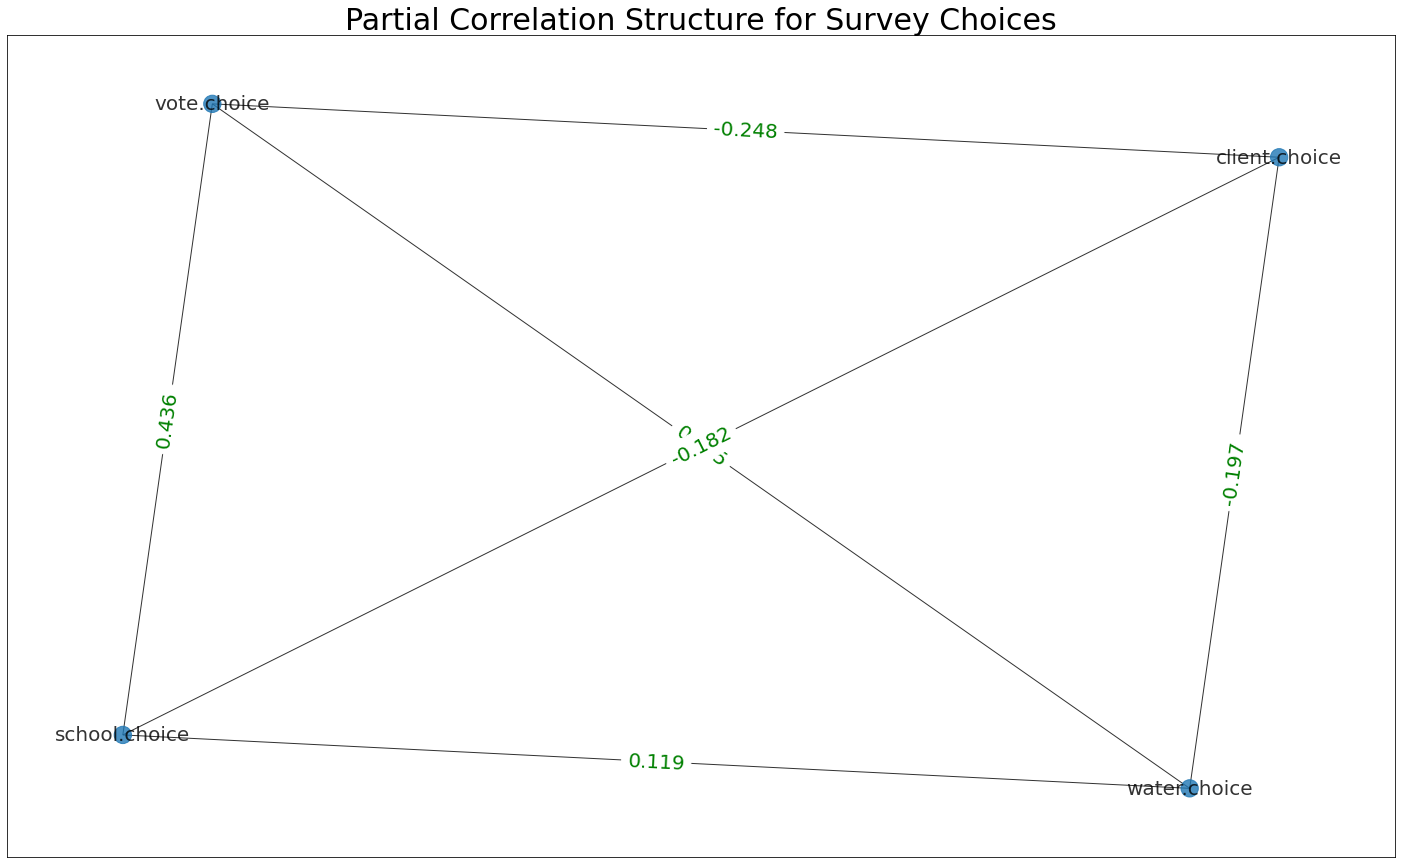

In [10]:
plt.rcParams['axes.ymargin'] = .1
plt.rcParams['axes.xmargin'] = .1
def graph_pcorr(p_vals_dct, corr_dct, title = "Macro Partial Correlations", sig = .001):

    # initiate graph
    graph = nx.Graph()
    #make list for edges
    edges = []
    # and a list for correlation values to use  as labels
    edge_labels = {}
    for key in p_vals_dct:
        for key2 in p_vals_dct[key]:
            # don't add edge:
            #   1. keys are identical
            #   2. If p-val > sig
            if key != key2  and p_vals_dct[key][key2] <= sig:
                edge = (key.replace(" ","\n"), key2.replace(" ","\n"))
                alt_edge = (edge[1],edge[0])
                # only append if keys are not already in edges as (key2, key)
                if alt_edge not in edges:
                    edges.append(edge)
                    edge_labels[edge] = str(corr_dct[key][key2])

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    # make all nodes in graph blue ("C0")
    color_map = ["C0" for g in graph]
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    # automatically space nodes
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = .8,
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
graph_pcorr(p_vals_dct, corr_dct, "Partial Correlation Structure for Survey Choices")

# Generate interaction terms and run regression using these in lieu of multivariate

In [11]:
endog_choice = ["water.choice", "school.choice", "client.choice", "vote.choice"]
exog = ["Money", "Jobs", "Schools", "party", "Woman", "WomanStrong", "Vignette"]
exog = exog +  ["Money X Vignette", "Jobs X Vignette", "Money X Wealth", 
                "Jobs X Wealth", "Vignette X Wealth", "Money X Vignette X Wealth", 
                "Jobs X Vignette X Wealth"]
data["Money X Vignette"] = data["Money"].mul(data["Vignette"])
data["Jobs X Vignette"] = data["Jobs"].mul(data["Vignette"])
data["Money X Wealth"] = data["Money"].mul(data["Wealth"])
data["Jobs X Wealth"] = data["Jobs"].mul(data["Wealth"])
data["Vignette X Wealth"] = data["Vignette"].mul(data["Wealth"])
data["Money X Vignette X Wealth"] = data["Money"].mul(data["Vignette"]).mul(data["Wealth"])
data["Jobs X Vignette X Wealth"] = data["Jobs"].mul(data["Vignette"]).mul(data["Wealth"])

predict_dict = {}
residual_dict = {}
for y in endog_choice:
    Y = data[y]
    X = data[exog]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit(cov_type='HC1')
    predict_dict[y] =results.predict()
    residual_dict[y] = Y - predict_dict[y]
    print(results.summary())
    print(pd.DataFrame(results.params, list(X.keys())))

                            OLS Regression Results                            
Dep. Variable:           water.choice   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     49.36
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          8.44e-132
Time:                        08:35:52   Log-Likelihood:                -4882.1
No. Observations:                7136   AIC:                             9794.
Df Residuals:                    7121   BIC:                             9897.
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

                            OLS Regression Results                            
Dep. Variable:            vote.choice   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     68.56
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.46e-183
Time:                        08:35:52   Log-Likelihood:                -4780.9
No. Observations:                7136   AIC:                             9592.
Df Residuals:                    7121   BIC:                             9695.
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [12]:
pd.DataFrame(residual_dict).corr()

,water.choice,school.choice,client.choice,vote.choice
water.choice,1.000000,0.498138,-0.442820,0.592581
school.choice,0.498138,1.000000,-0.453014,0.616080
client.choice,-0.442820,-0.453014,1.000000,-0.495927
vote.choice,0.592581,0.616080,-0.495927,1.000000
